In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

    TLX_MentalDemand  TLX_PhysicalDemand  TLX_TimeDemand  TLX_Performance  \
0                 80                  45             100               50   
1                 70                  40              90               50   
2                 70                  45              95               50   
3                 70                  50              90               40   
4                 75                  10              10                5   
5                 75                  65              30                5   
6                 80                  10              10                0   
7                 75                  30              10               10   
8                 85                  50              70               25   
9                 50                  70              50               30   
10                35                  70              50               10   
11                10                  30              10               10   

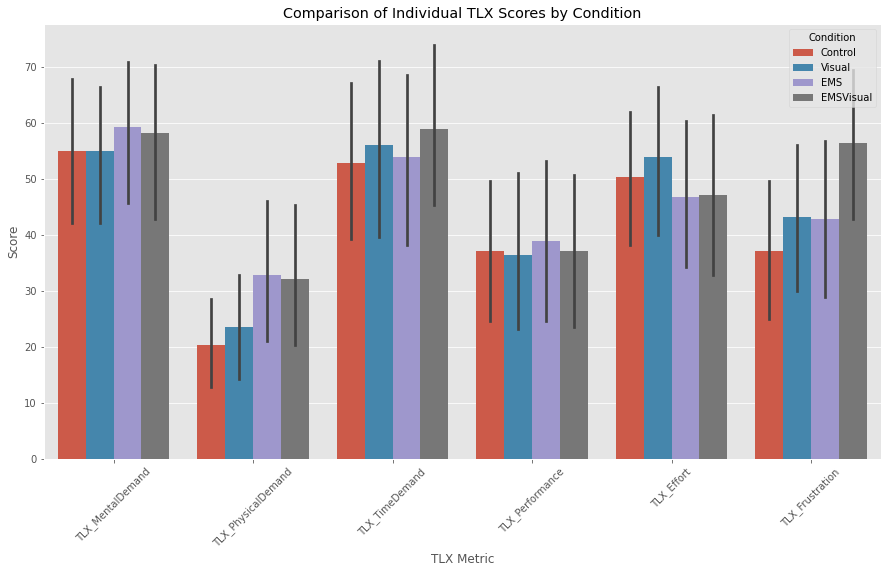

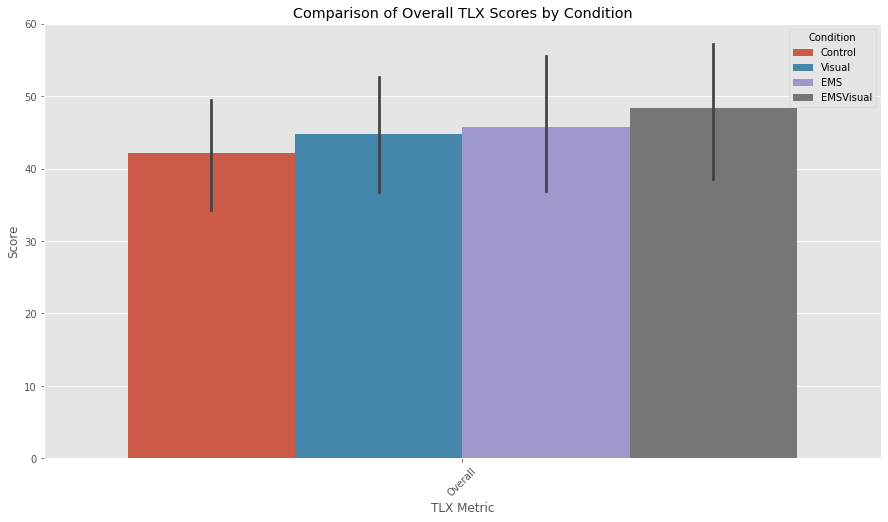

In [7]:
final_data_df = pd.read_csv('./final_data.csv')

# Filter out participants who according to their anwser to certain questions
# and therefore are not eligible for the study
final_data_df = final_data_df[final_data_df['DataProtectionAgreement'] == True]
final_data_df = final_data_df[final_data_df['LiabilityWaiverSigned'] == True]
final_data_df = final_data_df[final_data_df['HasPacemaker'] == False]
final_data_df = final_data_df[final_data_df['Colorblindness'] == False]
final_data_df = final_data_df[final_data_df['HandDominance'] == 'right']

# Get the UEQ columns grouped by the condition column
tlx_columns = [col for col in final_data_df.columns if col.startswith(
    'TLX')] + ['Condition']

plt.style.use('ggplot')
# Filter the DataFrame to only include the relevant columns
filtered_df = final_data_df[tlx_columns]
# Melt the DataFrame to make it easier to plot
melted_df = filtered_df.melt(id_vars='Condition', var_name='Metric', value_name='Value')
print(filtered_df)

# Compute the overall mean scores for each condition
overall_scores = filtered_df.drop(columns=['Condition']).mean(axis=1)
overall_df = pd.DataFrame(
    {'Condition': filtered_df['Condition'], 'Overall': overall_scores})

# Melt the DataFrame for overall scores
melted_overall_df = overall_df.melt(
    id_vars='Condition', var_name='Metric', value_name='Value')

# Plot the individual TLX metrics
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Value', hue='Condition',
            data=melted_df[melted_df['Metric'] != 'Overall'])
plt.title('Comparison of Individual TLX Scores by Condition')
plt.ylabel('Score')
plt.xlabel('TLX Metric')
plt.xticks(rotation=45)
plt.show()

# Plot the overall scores
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Value', hue='Condition', data=melted_overall_df)
plt.title('Comparison of Overall TLX Scores by Condition')
plt.ylabel('Score')
plt.xlabel('TLX Metric')
plt.xticks(rotation=45)
plt.show()

In [3]:
# Assuming the TLX scores are organized in the DataFrame filtered_df
for metric in tlx_columns[:-1]:
    # Get the data for the metric
    groups = [filtered_df[filtered_df['Condition'] == condition][metric] for condition in filtered_df['Condition'].unique()]

    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"ANOVA test for {metric}: F = {f_statistic}, p = {p_value}")

ANOVA test for TLX_MentalDemand: F = 0.10532168387609216, p = 0.9566060020651732
ANOVA test for TLX_PhysicalDemand: F = 1.1547332311510108, p = 0.3359177210571954
ANOVA test for TLX_TimeDemand: F = 0.11278195488721802, p = 0.9522467645972358
ANOVA test for TLX_Performance: F = 0.021013671727471848, p = 0.9958142697011413
ANOVA test for TLX_Effort: F = 0.22052533138163774, p = 0.881714647561944
ANOVA test for TLX_Frustration: F = 1.3983886174680724, p = 0.25371381247907454


ANOVA test results indicate that there is no significant difference in the TLX scores (Mental Demand, Physical Demand, Time Demand, Performance, Effort, Frustration) across the conditions (p > 0.05 in all cases).

In [4]:
# Example using Tukey's HSD for one of the TLX metrics
metric_data = filtered_df['TLX_Frustration']
condition_data = filtered_df['Condition']

tukey_result = pairwise_tukeyhsd(metric_data, condition_data)
print(tukey_result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
  Control       EMS   5.7143 0.9361 -20.2082 31.6368  False
  Control EMSVisual  19.2857 0.2108  -6.6368 45.2082  False
  Control    Visual   6.0714 0.9247  -19.851 31.9939  False
      EMS EMSVisual  13.5714 0.5115  -12.351 39.4939  False
      EMS    Visual   0.3571    1.0 -25.5653 26.2796  False
EMSVisual    Visual -13.2143 0.5341 -39.1368 12.7082  False
-----------------------------------------------------------


The Tukey's HSD post-hoc test also shows that there are no significant differences between the means of any pair of groups, as indicated by the 'reject' column. In all cases, the null hypothesis that the means of the groups are equal is not rejected (False).

In [5]:
metric_data = [filtered_df[filtered_df['Condition'] == condition]['TLX_Frustration'] for condition in filtered_df['Condition'].unique()]

h_statistic, p_value = stats.kruskal(*metric_data)
print(f"Kruskal-Wallis test: H = {h_statistic}, p = {p_value}")


Kruskal-Wallis test: H = 3.955173311203949, p = 0.2663454639849037


The Kruskal-Wallis test, a non-parametric alternative to ANOVA, also indicates no significant difference in the groups (p > 0.05).

In [6]:

final_data_df = pd.read_csv('./final_data.csv')

# Filter out participants who according to their anwser to certain questions
# and therefore are not eligible for the study
final_data_df = final_data_df[final_data_df['DataProtectionAgreement'] == True]
final_data_df = final_data_df[final_data_df['LiabilityWaiverSigned'] == True]
final_data_df = final_data_df[final_data_df['HasPacemaker'] == False]
final_data_df = final_data_df[final_data_df['Colorblindness'] == False]
final_data_df = final_data_df[final_data_df['HandDominance'] == 'right']

# Get the UEQ columns grouped by the condition column
tlx_columns = [col for col in final_data_df.columns if col.startswith(
    'TLX')] + ['Condition']

plt.style.use('ggplot')

filtered_df = final_data_df[tlx_columns].copy()

# Make sure to exclude 'Condition' when calculating mean
tlx_columns.remove('Condition')
filtered_df['Overall'] = filtered_df[tlx_columns].mean(axis=1)
filtered_df.to_csv('tlx_final.csv', index=False)

filtered_df


,TLX_MentalDemand,TLX_PhysicalDemand,TLX_TimeDemand,TLX_Performance,TLX_Effort,TLX_Frustration,Condition,Overall
0,80,45,100,50,70,75,Control,70.000000
1,70,40,90,50,65,65,Visual,63.333333
2,70,45,95,50,75,75,EMS,68.333333
3,70,50,90,40,70,70,EMSVisual,65.000000
4,75,10,10,5,75,50,Visual,37.500000
5,75,65,30,5,75,60,EMSVisual,51.666667
6,80,10,10,0,85,10,Control,32.500000
7,75,30,10,10,65,65,EMS,42.500000
8,85,50,70,25,25,85,EMSVisual,56.666667
9,50,70,50,30,70,50,EMS,53.333333
